In [25]:
#Resposta da Atividade7

In [26]:
#from google.colab import drive
#drive.mount('/content/drive')  # Monta o Google Drive.Trabalhei no Jupyter colab também
!pip install pandas
import pandas as pd

# Carrega os dados do arquivo CSV
vinhos = pd.read_csv("vinhos.csv")

# Exibe as primeiras linhas do DataFrame
vinhos.head()

,acidez_fixa,acidez_volatil,acido_citrico,concentracao_residual_acucar,cloretos,dioxido_de_enxofre_livre,dioxido_de_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,tipo
0,8.9,0.745,0.18,2.5,0.077,15.0,48.0,0.99739,3.20,0.47,9.7,6,tinto
1,7.5,0.520,0.42,2.3,0.087,8.0,38.0,0.99720,3.58,0.61,10.5,6,tinto
2,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,7,tinto
3,7.8,0.910,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,6,tinto
4,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5,tinto


In [27]:
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ... (código anterior para carregar os dados) ...

# Converte a coluna 'tipo' para numérica usando Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
vinhos['tipo'] = encoder.fit_transform(vinhos['tipo'])


In [29]:
# Mostrando a coluna tipo.
vinhos.tail()


,acidez_fixa,acidez_volatil,acido_citrico,concentracao_residual_acucar,cloretos,dioxido_de_enxofre_livre,dioxido_de_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,tipo
2995,6.6,0.310,0.07,1.5,0.033,55.0,144.0,0.99208,3.16,0.42,10.0,5,0
2996,6.2,0.240,0.27,2.9,0.039,30.0,123.0,0.98959,3.12,0.37,12.8,6,0
2997,5.1,0.350,0.26,6.8,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,6,0
2998,8.0,0.450,0.28,10.8,0.051,25.0,157.0,0.99570,3.06,0.47,11.4,7,0
2999,7.4,0.105,0.34,12.2,0.050,57.0,146.0,0.99730,3.16,0.37,9.0,6,0


In [30]:
# Confirmando o tipo das colunas
vinhos.dtypes

acidez_fixa                     float64
acidez_volatil                  float64
acido_citrico                   float64
concentracao_residual_acucar    float64
cloretos                        float64
dioxido_de_enxofre_livre        float64
dioxido_de_enxofre_total        float64
densidade                       float64
pH                              float64
sulfatos                        float64
alcool                          float64
qualidade                         int64
tipo                              int64
dtype: object

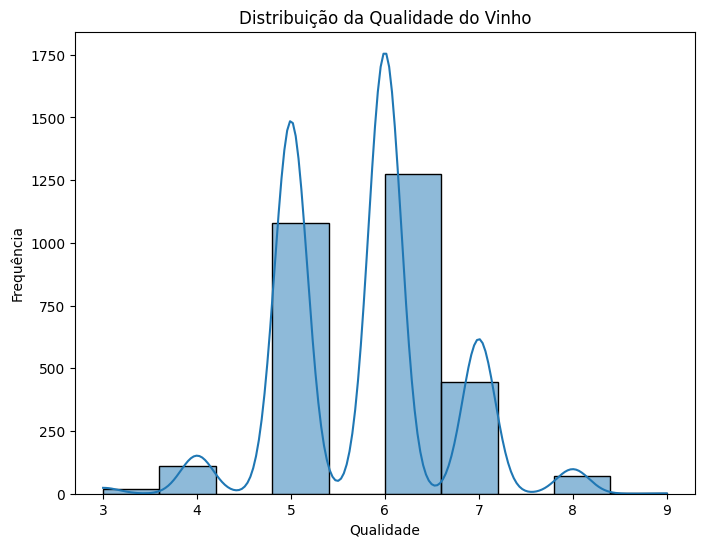

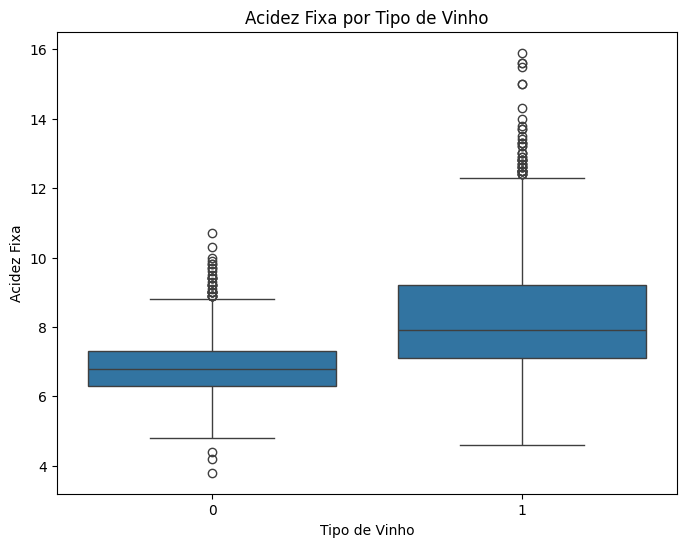

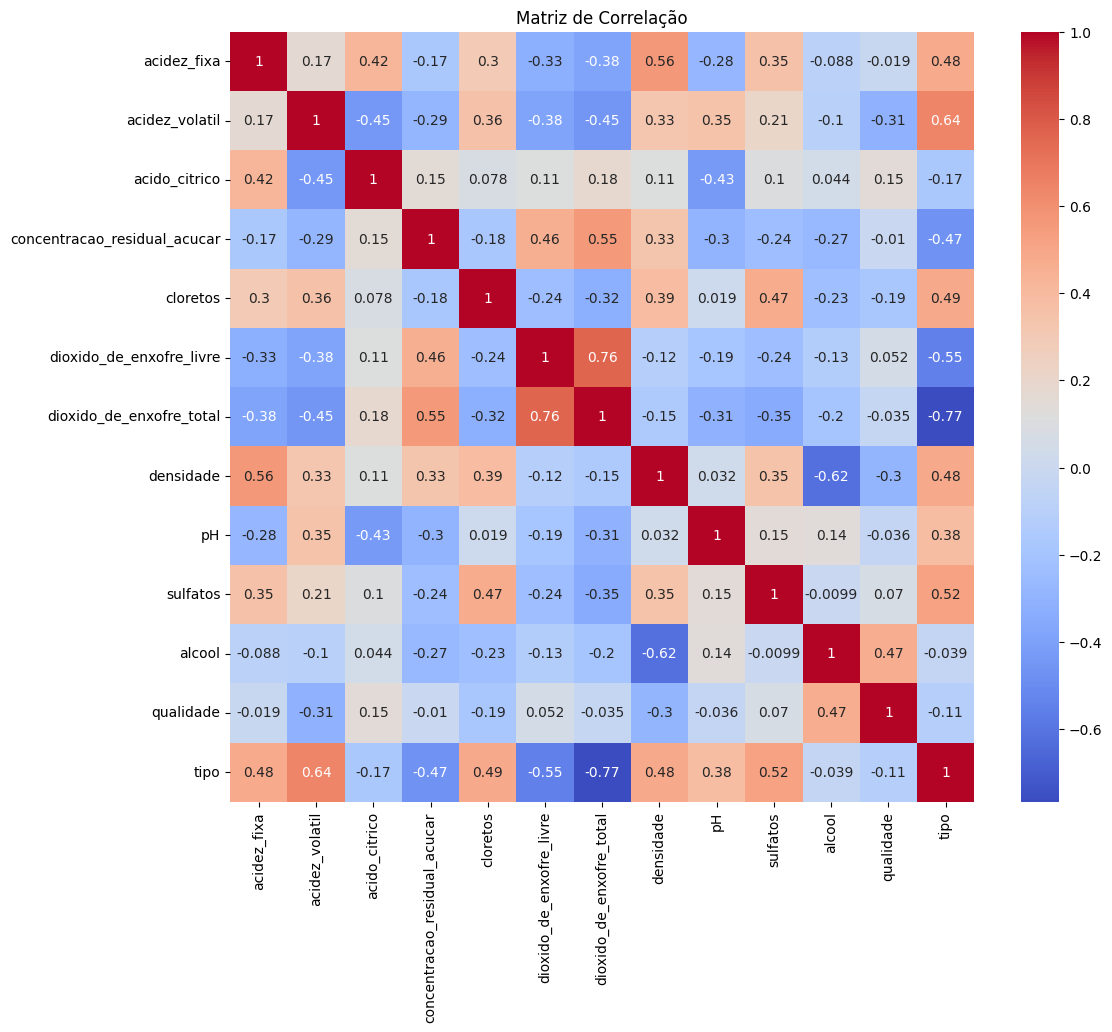

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resumo estatístico das variáveis numéricas
vinhos.describe()

# Histograma da qualidade do vinho
plt.figure(figsize=(8, 6))
sns.histplot(vinhos['qualidade'], bins=10, kde=True)
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.show()

# Boxplot da acidez fixa por tipo de vinho
plt.figure(figsize=(8, 6))
sns.boxplot(x='tipo', y='acidez_fixa', data=vinhos)
plt.title('Acidez Fixa por Tipo de Vinho')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Acidez Fixa')
plt.show()

# Matriz de correlação entre as variáveis
plt.figure(figsize=(12, 10))
sns.heatmap(vinhos.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Cria um codificador de rótulos
encoder = LabelEncoder()

# Codifica a variável 'type' (tinto/branco)
vinhos['tipo_encoded'] = encoder.fit_transform(vinhos['tipo'])

# Cria rótulos para a qualidade do vinho (superior/inferior a 6)
vinhos['qualidade_rotulo'] = (vinhos['qualidade'] > 6).astype(int)

# Define as características (X) e o alvo (y) para a classificação por tipo
# Corrected column names to match the DataFrame
X_type = vinhos[['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'concentracao_residual_acucar','cloretos', 'dioxido_de_enxofre_livre', 'dioxido_de_enxofre_total', 'densidade', 'pH', 'sulfatos', 'alcool']]
y_type = vinhos['tipo_encoded'] # Now this line should work

# Define as características (X) e o alvo (y) para a classificação por qualidade
X_quality = X_type  # Usando as mesmas características
y_quality = vinhos['qualidade_rotulo'] # Using 'qualidade_rotulo' as it was created earlier


# Separa os dados em treino e teste (80% treino, 20% teste)
X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(X_type, y_type, test_size=0.2, random_state=42)
X_quality_train, X_quality_test, y_quality_train, y_quality_test = train_test_split(X_quality, y_quality, test_size=0.2, random_state=42)

In [33]:
from sklearn.svm import SVC

# Cria um modelo SVM para classificação por tipo
svm_type = SVC(kernel='linear')
svm_type.fit(X_type_train, y_type_train)

# Cria um modelo SVM para classificação por qualidade
svm_quality = SVC(kernel='rbf')
svm_quality.fit(X_quality_train, y_quality_train)

SVC()

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Carrega os dados do arquivo CSV
vinhos = pd.read_csv("vinhos.csv")

# Exibe as primeiras linhas do DataFrame
print(vinhos.head())

# Tarefa 1: Classificação de vinho do tipo ‘tinto’ ou ‘branco’
# Supondo que a coluna 'tipo' contém 'tinto' ou 'branco'
vinhos['tipo'] = vinhos['tipo'].map({'tinto': 0, 'branco': 1})

# Tarefa 2: Classificação entre os vinhos com qualidade superior ou inferior a 6
# Supondo que a coluna 'qualidade' contém a qualidade do vinho
vinhos['qualidade_binaria'] = vinhos['qualidade'].apply(lambda x: 1 if x > 6 else 0)

# Escolha as colunas de características (features) e os rótulos (labels)
features = vinhos.drop(columns=['tipo', 'qualidade', 'qualidade_binaria'])
labels_tipo = vinhos['tipo']
labels_qualidade = vinhos['qualidade_binaria']

# Dividir os dados em conjuntos de treinamento e teste
X_train_tipo, X_test_tipo, y_train_tipo, y_test_tipo = train_test_split(features, labels_tipo, test_size=0.2, random_state=42)
X_train_qualidade, X_test_qualidade, y_train_qualidade, y_test_qualidade = train_test_split(features, labels_qualidade, test_size=0.2, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train_tipo = scaler.fit_transform(X_train_tipo)
X_test_tipo = scaler.transform(X_test_tipo)
X_train_qualidade = scaler.fit_transform(X_train_qualidade)
X_test_qualidade = scaler.transform(X_test_qualidade)

# Treinar um modelo de classificação para a tarefa 1 (tipo de vinho)
modelo_tipo = LogisticRegression(max_iter=1000)
modelo_tipo.fit(X_train_tipo, y_train_tipo)

# Avaliar o modelo para a tarefa 1
predicoes_tipo = modelo_tipo.predict(X_test_tipo)
acuracia_tipo = accuracy_score(y_test_tipo, predicoes_tipo)
print(f"Acurácia para a classificação do tipo de vinho: {acuracia_tipo}")

# Treinar um modelo de classificação para a tarefa 2 (qualidade do vinho)
modelo_qualidade = LogisticRegression(max_iter=1000)
modelo_qualidade.fit(X_train_qualidade, y_train_qualidade)

# Avaliar o modelo para a tarefa 2
predicoes_qualidade = modelo_qualidade.predict(X_test_qualidade)
acuracia_qualidade = accuracy_score(y_test_qualidade, predicoes_qualidade)
print(f"Acurácia para a classificação da qualidade do vinho: {acuracia_qualidade}")

   acidez_fixa  acidez_volatil  acido_citrico  concentracao_residual_acucar  \
0          8.9           0.745           0.18                           2.5   
1          7.5           0.520           0.42                           2.3   
2          8.3           0.300           0.49                           3.8   
3          7.8           0.910           0.07                           1.9   
4          7.2           0.340           0.32                           2.5   

   cloretos  dioxido_de_enxofre_livre  dioxido_de_enxofre_total  densidade  \
0     0.077                      15.0                      48.0    0.99739   
1     0.087                       8.0                      38.0    0.99720   
2     0.090                      11.0                      24.0    0.99498   
3     0.058                      22.0                      47.0    0.99525   
4     0.090                      43.0                     113.0    0.99660   

     pH  sulfatos  alcool  qualidade   tipo  
0  3.20   